In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2024-11-1'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price                       Date   Adj Close       Close        High  \
Ticker                                  GOOG        GOOG        GOOG   
0      2012-01-03 00:00:00+00:00   16.532528   16.573130   16.641375   
1      2012-01-04 00:00:00+00:00   16.603836   16.644611   16.693678   
2      2012-01-05 00:00:00+00:00   16.373516   16.413727   16.537264   
3      2012-01-06 00:00:00+00:00   16.150156   16.189817   16.438385   
4      2012-01-09 00:00:00+00:00   15.465409   15.503389   16.114599   
...                          ...         ...         ...         ...   
3224   2024-10-25 00:00:00+00:00  166.990005  166.990005  167.399994   
3225   2024-10-28 00:00:00+00:00  168.339996  168.339996  170.606003   
3226   2024-10-29 00:00:00+00:00  171.139999  171.139999  171.860001   
3227   2024-10-30 00:00:00+00:00  176.139999  176.139999  183.789993   
3228   2024-10-31 00:00:00+00:00  172.690002  172.690002  178.419998   

Price          Low        Open     Volume  
Ticker        GOOG        GOOG       GOOG  
0        16.248346   16.262545  147611217  
1        16.453827   16.563665  114989399  
2        16.344486   16.491436  131808205  
3        16.184088   16.417213  108119746  
4        15.472754   16.102144  233776981  
...            ...         ...        ...  
3224    165.229996  165.365005   14566400  
3225    165.789993  170.589996   20858300  
3226    168.660004  169.384995   28916100  
3227    175.744995  182.410004   49698300  
3228    172.559998  174.720001   32801900  

[3229 rows x 7 columns]

In [6]:
data = data.drop(['Date', 'Adj Close'], axis = 1)
data.head()

<ipython-input-6-24cea0129908>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(['Date', 'Adj Close'], axis = 1)


Price       Close       High        Low       Open     Volume
Ticker       GOOG       GOOG       GOOG       GOOG       GOOG
0       16.573130  16.641375  16.248346  16.262545  147611217
1       16.644611  16.693678  16.453827  16.563665  114989399
2       16.413727  16.537264  16.344486  16.491436  131808205
3       16.189817  16.438385  16.184088  16.417213  108119746
4       15.503389  16.114599  15.472754  16.102144  233776981

In [7]:
ma_100_days = data.Close.rolling(100).mean()

In [8]:
ma_100_days

Ticker      GOOG
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
3224    170.3872
3225    170.2999
3226    170.2278
3227    170.2297
3228    170.1903

[3229 rows x 1 columns]

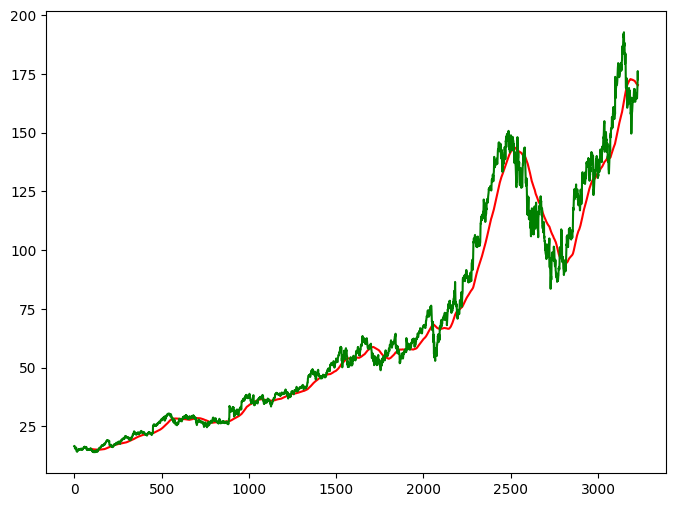

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

In [11]:
ma_200_days

Ticker       GOOG
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
3224    162.60830
3225    162.73165
3226    162.86615
3227    163.02645
3228    163.17545

[3229 rows x 1 columns]

[]

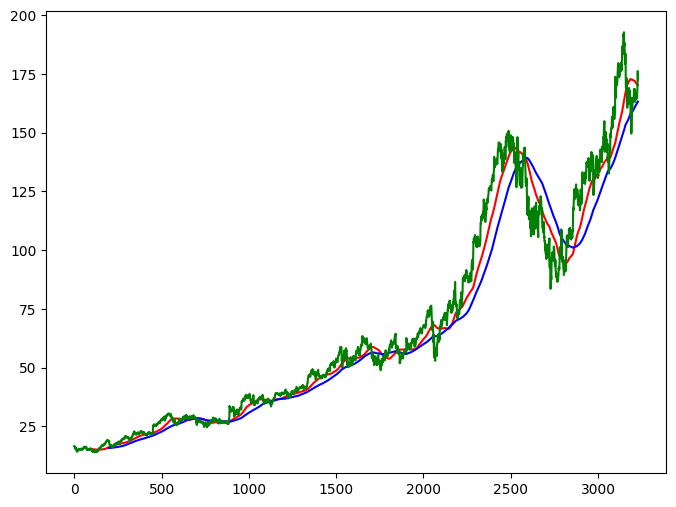

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.plot()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train = pd.DataFrame(data.Close[0 : int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : int(len(data))])

In [15]:
print("Length of Training dataset:",data_train.shape[0])
print("Length of Testing dataset:",data_test.shape[0])

Length of Training dataset: 2583
Length of Testing dataset: 646


In [16]:
data_train.head()

Ticker       GOOG
0       16.573130
1       16.644611
2       16.413727
3       16.189817
4       15.503389

In [17]:
data_test.tail()

Ticker        GOOG
3224    166.990005
3225    168.339996
3226    171.139999
3227    176.139999
3228    172.690002

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.94833863],
       [0.92948057],
       [0.90106364]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])

x_train

[array([[0.01936668],
        [0.01988927],
        [0.01820133],
        [0.01656439],
        [0.01154608],
        [0.0116699 ],
        [0.01218339],
        [0.01285346],
        [0.01200676],
        [0.01266045],
        [0.01344889],
        [0.01466158],
        [0.0049054 ],
        [0.00481982],
        [0.00398405],
        [0.00190098],
        [0.00164788],
        [0.00381107],
        [0.00339409],
        [0.00383474],
        [0.00396584],
        [0.00474516],
        [0.00678818],
        [0.0091116 ],
        [0.00868915],
        [0.00924998],
        [0.00954313],
        [0.00853256],
        [0.00967788],
        [0.00923359],
        [0.00846883],
        [0.00864363],
        [0.00830131],
        [0.01000563],
        [0.00890219],
        [0.00856898],
        [0.00925908],
        [0.00915165],
        [0.01080499],
        [0.01077951],
        [0.01153516],
        [0.01132576],
        [0.01005116],
        [0.00835958],
        [0.00869461],
        [0

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape[1]

100

In [ ]:
# x = []
# y = []
# for i in range(100, data_train_scale.shape[0]):
#     x.append(data_train_scale[i-100:i])
#     y.append(data_train_scale[i:0])

In [ ]:
# x, y = np.array(x), np.array(y)

In [ ]:
# from keras.layers import Dense, Dropout, LSTM
# from keras.models import Sequential

In [ ]:
# model = Sequential()
# model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1))))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.3))

# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4))

# model.add(LSTM(units = 120, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=1))

In [ ]:
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
65/65 [==============================] - 57s 588ms/step - loss: nan
Epoch 2/50
65/65 [==============================] - 36s 555ms/step - loss: nan
Epoch 3/50
65/65 [==============================] - 51s 790ms/step - loss: nan
Epoch 4/50
65/65 [==============================] - 39s 595ms/step - loss: nan
Epoch 5/50
65/65 [==============================] - 45s 687ms/step - loss: nan
Epoch 6/50
65/65 [==============================] - 43s 654ms/step - loss: nan
Epoch 7/50
65/65 [==============================] - 59s 903ms/step - loss: nan
Epoch 8/50
65/65 [==============================] - 51s 789ms/step - loss: nan
Epoch 9/50
65/65 [==============================] - 50s 764ms/step - loss: nan
Epoch 10/50
65/65 [==============================] - 51s 779ms/step - loss: nan
Epoch 11/50
65/65 [==============================] - 67s 1s/step - loss: nan
Epoch 12/50
65/65 [==============================] - 77s 1s/step - loss: nan
Epoch 13/50
65/65 [==============================] - 53

In [ ]:
# ML Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - loss: 0.0474
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0048
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0033
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0037
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0035
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0035
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0033
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0035
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0027
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0029
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0031
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0024
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0031
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0023
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0020
Ep

In [28]:
!pip install h5py

In [29]:
import h5py

In [30]:
model.save('stock_predictions.h5')

In [31]:
data_test.head()

Ticker        GOOG
2583    136.464996
2584    134.010498
2585    129.796494
2586    128.374496
2587    130.285995

In [32]:
past_100_days = data_train.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [35]:
final_df.head()

Ticker        GOOG
0       149.645493
1       149.388000
2       149.076004
3       149.061996
4       150.709000

In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.605986  ],
       [0.60362736],
       [0.60076947],
       [0.60064116],
       [0.61572775],
       [0.60879819],
       [0.58247234],
       [0.57952737],
       [0.5791655 ],
       [0.54333607],
       [0.57363742],
       [0.54009339],
       [0.53245393],
       [0.55222592],
       [0.54072082],
       [0.55240902],
       [0.59124757],
       [0.59751308],
       [0.59188423],
       [0.59709629],
       [0.57904641],
       [0.56316299],
       [0.58512868],
       [0.56195383],
       [0.54330853],
       [0.53963088],
       [0.55629297],
       [0.5812861 ],
       [0.58305854],
       [0.59149944],
       [0.57669687],
       [0.57721444],
       [0.57261611],
       [0.56049742],
       [0.56411553],
       [0.55808833],
       [0.49613907],
       [0.49520009],
       [0.4901942 ],
       [0.50457089],
       [0.51779336],
       [0.53272872],
       [0.50967295],
       [0.51567737],
       [0.4836539 ],
       [0.47780519],
       [0.45815242],
       [0.426

In [37]:
input_data.shape

(746, 1)

In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(646, 100, 1)
(646,)


In [40]:
# predictions

y_predicted = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


In [41]:
y_predicted.shape

(646, 1)

In [42]:
y_test

array([0.48525232, 0.46276905, 0.42416867, 0.41114314, 0.42865252,
       0.40087019, 0.40735549, 0.43089682, 0.40996151, 0.37966016,
       0.33089675, 0.36420262, 0.32990746, 0.28882019, 0.32904185,
       0.28832555, 0.30839057, 0.31729872, 0.35801958, 0.30463038,
       0.29467806, 0.2710818 , 0.28482645, 0.27911513, 0.27178715,
       0.30251446, 0.28673174, 0.30421819, 0.26482552, 0.24966107,
       0.23653938, 0.25809743, 0.20551437, 0.20472201, 0.22722358,
       0.26847123, 0.27982964, 0.28072732, 0.31378586, 0.28463867,
       0.30704863, 0.30905469, 0.30913254, 0.28788128, 0.2559082 ,
       0.21422098, 0.21712926, 0.2464093 , 0.21201798, 0.22328023,
       0.26128973, 0.26146375, 0.26742239, 0.3210406 , 0.30349453,
       0.26638732, 0.26350189, 0.23708435, 0.23441424, 0.27843731,
       0.29058809, 0.32807548, 0.33597603, 0.30257854, 0.28725385,
       0.26286523, 0.25602275, 0.26817806, 0.24200792, 0.28515163,
       0.28588438, 0.28899882, 0.22780985, 0.22643583, 0.20106

In [43]:
y_predicted

array([[0.51418203],
       [0.51792955],
       [0.519659  ],
       [0.51857   ],
       [0.51427174],
       [0.50713915],
       [0.49750268],
       [0.48608148],
       [0.47409743],
       [0.46236545],
       [0.45102894],
       [0.4394626 ],
       [0.42775023],
       [0.41582596],
       [0.4034021 ],
       [0.391069  ],
       [0.37925947],
       [0.36834365],
       [0.35862017],
       [0.35046604],
       [0.34380847],
       [0.33840382],
       [0.33388478],
       [0.32997146],
       [0.32640332],
       [0.32300875],
       [0.31985676],
       [0.31697997],
       [0.31449783],
       [0.31230974],
       [0.3102253 ],
       [0.30802083],
       [0.30562264],
       [0.3028918 ],
       [0.29970708],
       [0.29604065],
       [0.29214224],
       [0.28848982],
       [0.28536442],
       [0.28307495],
       [0.28171954],
       [0.28134185],
       [0.2819063 ],
       [0.28338718],
       [0.28557226],
       [0.2880556 ],
       [0.29027152],
       [0.291

In [44]:
scale = scaler.scale_

In [45]:
factor = 1 / scale
y_predicted = y_predicted * factor
y_test = y_test * factor

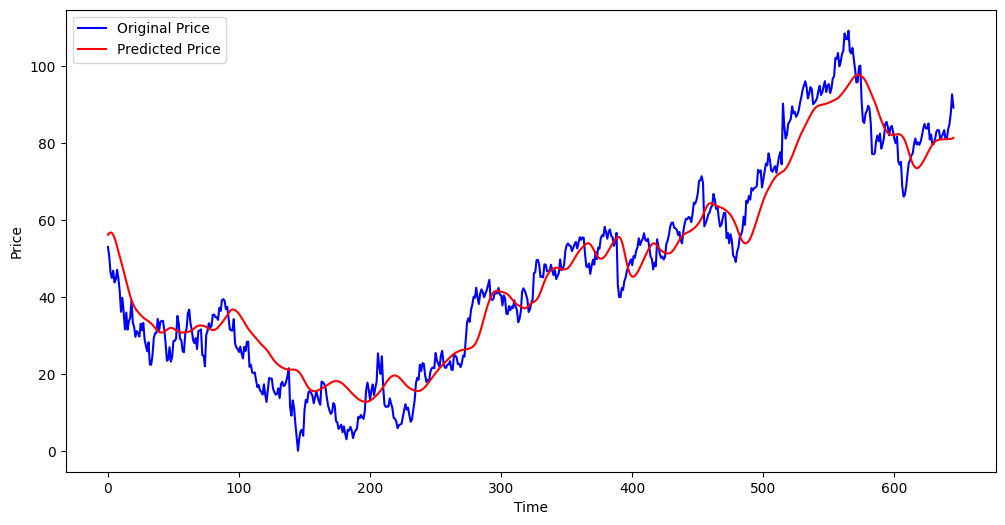

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()